In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


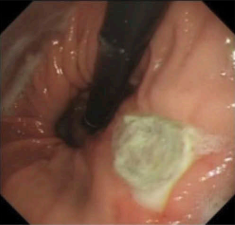

Top hat applied to image : 


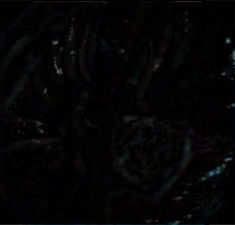

Black hat applied to image : 


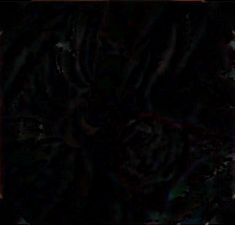

In [61]:
#reading the image
input_img = cv2.imread('/content/drive/My Drive/Colab Notebooks/projet TAI/meh.png')
## input_img = cv2.cvtColor(inpt_img, cv2.COLOR_BGR2RGB)
cv2_imshow(input_img)

#Defining needed kernel for top hat
filter_size = (12, 12)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, filter_size)

# Applying top hat and black hat
tophat_img = cv2.morphologyEx(input_img, cv2.MORPH_TOPHAT, kernel)
print("Top hat applied to image : ")
cv2_imshow(tophat_img)

bottomhat_img = cv2.morphologyEx(input_img, cv2.MORPH_BLACKHAT, kernel)
print("Black hat applied to image : ")
cv2_imshow(bottomhat_img)




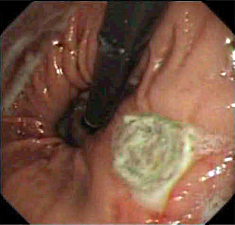

image after constrast stretching and MD filter :


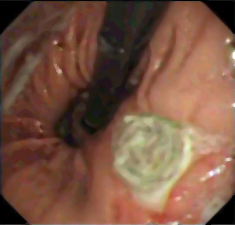

In [62]:
# combining the top and botton hat to perform the contraste stretching (part 1)
img_A = cv2.add(tophat_img, input_img)
img_C = cv2.subtract(img_A, bottomhat_img)
cv2_imshow(img_C)

# Apply median filter
print("image after constrast stretching and MD filter :")
image = cv2.medianBlur(img_C, 5)
cv2_imshow(image)

showing resulted image after cielab(cv2) in cv2 :


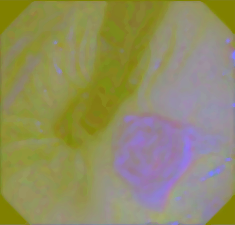

showing resulted image after cielab(cv2) in plt :


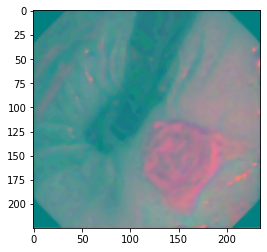

showing RGB image in cv2 :


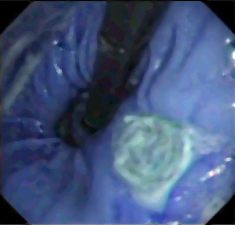

showing RGB image in plt :


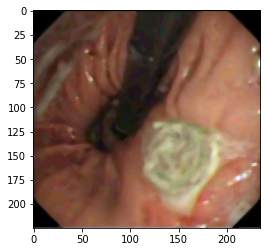

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


showing resulted image after cielab(scikit) in plt :


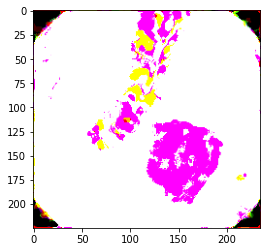

In [63]:
# CIELAB color transformation on the modified MD filtered image (using cv2)
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
print("showing resulted image after cielab(cv2) in cv2 :")
cv2_imshow(lab_image)
print("showing resulted image after cielab(cv2) in plt :")
plt.imshow(lab_image)
plt.show()

# CIELAB color transformation on the modified MD filtered image (using function & skimage)
from skimage import color

lab = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("showing RGB image in cv2 :")
cv2_imshow(lab)
print("showing RGB image in plt :")
plt.imshow(lab)
plt.show()
res_img = color.rgb2lab(lab) #transformation to cielab using scikit
print("showing resulted image after cielab(scikit) in plt :")
plt.imshow(res_img)
plt.show()


#**Calculate the color features** 
- Mean
- Variance
- SD
- Skewness
- Kurtosis

###**Mean, Variance, Standard deviation**

In [64]:
import numpy as np
import math
# extracting color features 
# mean
mean = np.mean(res_img)
print("Moyenne de l'image est : " +str(mean))

# variance
#  --> Utiliser la fonction var de numpy
var = np.var(res_img)
print("Variance de l'image est : "+str(var))
# --> Calculer la variance
res_reshaped = res_img.reshape(-1)
val = 0
for i in range(len(res_reshaped)) :
  val = val + (res_reshaped[i] - mean)*(res_reshaped[i] - mean)
var2 = val / (res_reshaped.size - 1)
print("Variance de l'image est : "+str(var2))

# Standard deviation
SD = math.sqrt(var)
print("Ecart type (standard deviaton) de l'image est : "+str(SD))


Moyenne de l'image est : 22.582200485094194
Variance de l'image est : 316.69420027084817
Variance de l'image est : 316.6961967795619
Ecart type (standard deviaton) de l'image est : 17.795904030727076


###**Kurtosis**
Kurtosis is a measure of whether the data is heavy-tailed or light-tailed relatively to a normal distribution.


  &rarr; high kurtosis == heavy tailed :

which indicates that there are outliers (data vey big compared to the majority), and the contrary :    

 &rarr; low kurtosis == light tailed data : 
 
indicates the lack of outliers.

  In our case, we are operating on a image in the CIELAB format, hence we will calculate the kurtosis for each channel ( 2 in this case a and b )

In [118]:
from scipy.stats import kurtosis,skew

# split the image channels 
l, a, b = cv2.split(res_img)
w, h = a.shape

# calculate the kurtosis for both a and b : color channels 
a_kurtosis = kurtosis(a)
b_kurtosis = kurtosis(b)

kurtosis_vect = a_kurtosis + b_kurtosis

# --> calculer avec la formule de l'article
kurtosis_vector = []

for i in range(w):
  k_val = 0
  for j in range(h):
    a_k = (a[i][j] - mean) / w*h*3
    b_k = (b[i][j] - mean) / w*h*3
    k_val = k_val + a_k + b_k
  k_res = k_val / SD**4
  kurtosis_vector.append(round(k_res,2))


print(len(kurtosis_vector))
print(kurtosis_vector)

225
[-0.34, -0.24, -0.23, -0.22, -0.21, -0.21, -0.21, -0.21, -0.2, -0.2, -0.19, -0.19, -0.19, -0.18, -0.18, -0.18, -0.18, -0.18, -0.17, -0.17, -0.17, -0.17, -0.17, -0.17, -0.17, -0.16, -0.16, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.14, -0.14, -0.14, -0.14, -0.14, -0.14, -0.14, -0.14, -0.13, -0.13, -0.13, -0.13, -0.12, -0.13, -0.12, -0.12, -0.13, -0.13, -0.13, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.13, -0.13, -0.13, -0.12, -0.12, -0.12, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.1, -0.11, -0.11, -0.11, -0.1, -0.1, -0.1, -0.1, -0.1, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.1, -0.1, -0.1, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.14, -0.14, -0.14, -0.14, -0.15, -0.15, -0.15, -0.15, -0.15, -0.16, -0.16, -0.16, -0.16, -0.16, -0.16, -0.16, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.14, -0.14

###**Skewness**

In [113]:
# Calculer skewness avec la formule de l'article
skewness_vector = []
for i in range(w):
  s_val = 0
  for j in range(h):
    a_s = ((a[i][j] - mean) /  SD )**3
    b_s = ((b[i][j] - mean) /  SD )**3
    s_val = s_val + a_s + b_s
  s_res = s_val * (w*h*3) / (w*h*3)**2 - (w*h*3)*3 - 2
  skewness_vector.append(round(s_res, 2))
print(skewness_vector)
print(len(skewness_vector))

[-475877.01, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.0, -475877.

##**Create the final vecto containing the color featuers**

In [123]:
final_vector = []
final_vector.append(round(mean, 2))
final_vector.append(round(var2, 2))
final_vector.append(round(SD, 2))
final_vector = final_vector + kurtosis_vector + skewness_vector

print(len(final_vector))

453


##**Mean deviation MD**

In [125]:
sum = 0
for i in range(len(final_vector)):
  val = final_vector[i] - np.mean(final_vector)
  sum = sum + val
MD = sum / len(final_vector)
print(MD)

3.126252516610733e-10


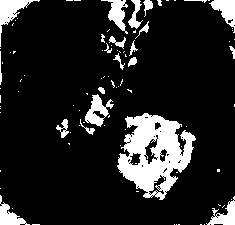

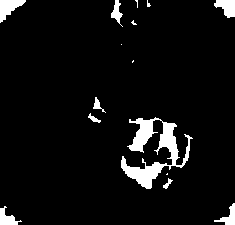

In [142]:
test = a.copy()
for i in range(w):
  for j in range(h):
    if a[i][j]>MD:
      test[i][j]=0
    else:
      test[i][j]=255
cv2_imshow(test)
kernel = np.ones((5,5),np.uint8)
eroded = cv2.erode(test, kernel)
kernel1 = np.ones((7,7),np.uint8)
dilated = cv2.dilate(eroded, kernel1)
print()
cv2_imshow(eroded)